In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import pickle

In [2]:
# Load the dataset
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['MEDV']=boston.target
bos.shape

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

(506, 14)

In [3]:
# 1. Check for any missing value in data
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
display(bos.head())
display(bos.info())
display(bos.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
bos.iloc[98]

CRIM         0.08187
ZN           0.00000
INDUS        2.89000
CHAS         0.00000
NOX          0.44500
RM           7.82000
AGE         36.90000
DIS          3.49520
RAD          2.00000
TAX        276.00000
PTRATIO     18.00000
B          393.53000
LSTAT        3.57000
MEDV        43.80000
Name: 98, dtype: float64

In [6]:
#corrData = bos.corr()
#mask = np.zeros_like(corrData)
#mask[np.triu_indices_from(mask)] = True

#plt.figure(figsize=(19,9))
#sns.heatmap(corrData, vmin=-1, vmax=1, mask=mask, center = 0, annot=True, fmt="f", linewidths=.5)
#bos.drop(['TAX','NOX','DIS'], axis=1).corr()<-0.70
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
#vif = pd.DataFrame()
#features_select = [ 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
#features_select = [ 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
#boscopy = bos.copy()
#boscopy['NOXRM'] = boscopy['NOX']/boscopy['RM']
#bos11 = boscopy.drop(['RM','NOX','TAX'], axis=1)

#vif["VIF"] = [variance_inflation_factor(bos11, i) for i in range(len(bos11.columns))]
#vif["Features"] = bos11.columns
#vif

In [10]:
#feature_Data = bos[ [ 'CRIM','ZN','INDUS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
feature_Data = bos.iloc[:,:13]
X_train, X_test, y_train, y_test = train_test_split(feature_Data, bos['MEDV'], train_size=0.7, random_state=40)

In [ ]:
def solveOutliers(df,feature):
    percentile75 = df[feature].quantile(0.75)
    percentile25 = df[feature].quantile(0.25)
    IQR = percentile75 - percentile25
    lower = percentile25-(IQR*1.5)
    upper = percentile75+(IQR*1.5)
    df.loc[df[feature]>=upper,feature]=upper
    df.loc[df[feature]<=lower,feature]=lower

In [ ]:
for j in feature_Data:
    solveOutliers(feature_Data,j)
    feature_Data[j] = np.log(feature_Data[j]+1)

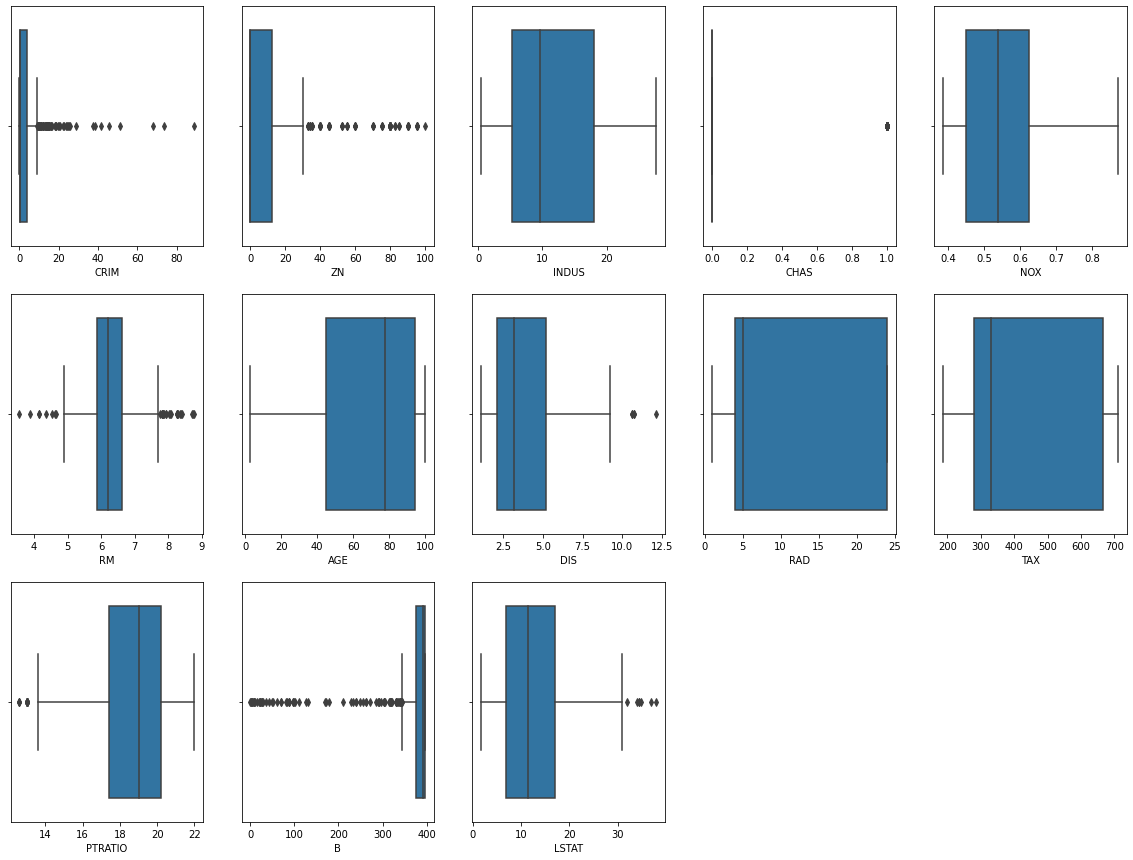

In [11]:
i=1

plt.rcParams["figure.figsize"] = [20, 15]
for j in feature_Data:
    plt.subplot(3,5,i)
    sns.boxplot(x=feature_Data[j])
    i = i+1

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

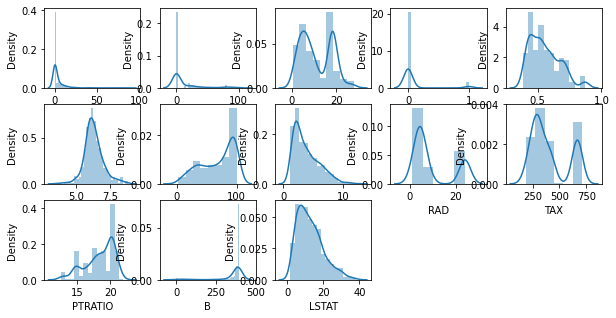

In [12]:
j=1

plt.rcParams["figure.figsize"] = [10, 5]
for x in feature_Data:
    plt.subplot(3,5,j)
    sns.distplot(feature_Data[x])
    j = j+1

In [13]:
#scaler =StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(boscopy), columns=boscopy.columns)
#X_scaled.describe()

#lm = smf.ols(formula='MEDV ~ ZN + TAX + PTRATIO + LSTAT', data=X_scaled).fit()
#lm.conf_int()
#lm.summary()

In [14]:
lrModel = LinearRegression()
lrModel.fit(X_train,y_train)
lrModel.intercept_

35.839894311578945

In [15]:
pd.DataFrame({'Features':feature_Data.columns,'Coefficent':lrModel.coef_})

,Features,Coefficent
0,CRIM,-0.102065
1,ZN,0.039204
2,INDUS,-0.061349
3,CHAS,3.480847
4,NOX,-17.459895
5,RM,3.664442
6,AGE,-0.005313
7,DIS,-1.370679
8,RAD,0.251448
9,TAX,-0.009438


In [16]:
y_predict_train = lrModel.predict(X_train)
display("R2 Score for Training Data -> "+str(lrModel.score(X_train,y_train)))
display("M.S.E Score for Training Data -> "+str(mean_squared_error(y_train,y_predict_train)))

y_predict_test = lrModel.predict(X_test)
display("R2 Score for Test Data -> "+str(lrModel.score(X_test,y_test)))
display("M.S.E Score for Test Data -> "+str(mean_squared_error(y_test,y_predict_test)))

'R2 Score for Training Data -> 0.7431215456774967'

'M.S.E Score for Training Data -> 18.353908924108246'

'R2 Score for Test Data -> 0.7215519718844169'

'M.S.E Score for Test Data -> 31.829631155557518'

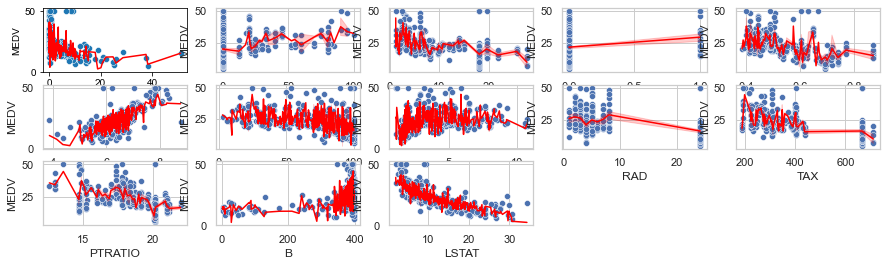

In [17]:
i=1

plt.rcParams["figure.figsize"] = [15, 4]
for j in X_train:
    plt.subplot(3,5,i)
    sns.set(style="whitegrid")
    sns.scatterplot(x=X_train[j],y=y_train)
    sns.lineplot(x=X_train[j],y=y_predict_train,color='red')
    i = i+1

In [18]:
l1 = Lasso()
l1.fit(X_train,y_train)
#CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	MEDV
display(l1.coef_)
display(l1.score(X_train,y_train))
display(l1.score(X_test,y_test))
display(l1.score(X_train,y_predict_train))
display(l1.score(X_test,y_predict_test))

array([-0.03938055,  0.0422291 , -0.06225092,  0.        , -0.        ,
        0.29664893,  0.01566191, -0.62043225,  0.22101379, -0.0135599 ,
       -0.65610396,  0.00614301, -0.7794773 ])

0.6657249068677625

0.6439373929767928

0.8958492870245426

0.9036689156309083

In [19]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
with open(filename, 'wb') as files:
    pickle.dump(lrModel, files)
#pickle.dump(lrModel, open(filename, 'wb'))